<a href="https://colab.research.google.com/github/Jyts2094/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing necessary libraries
import pandas as pd
import nltk
import re

In [3]:
# load the dataset

dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
# print the dataset shape
dataset.shape

(228207, 16)

In [5]:
import pandas as pd

# Assuming you have already loaded your dataset
dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)

# Define the sample size
sample_size = 100000

# Sample the dataset to reduce its size
dataset = dataset.sample(n=sample_size, random_state=0)

#  check the first few rows of the sampled dataset
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
112307,1408473814959153154,Hindustan Times,India,One of India's largest media companies. Latest...,2009-04-29 10:11:34,8087995,139,2928,True,2021-06-25 17:15:00,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",Twitter Media Studio,13,28,False
34439,1373296843489165320,Adam John Ritchie,"Oxford, UK",@UniofOxford COVID and rabies vaccine developm...,2011-10-03 11:11:48,2599,742,377,False,2021-03-20 15:34:16,@fascinatorfun I'd say exported vials is a ver...,NaN,Twitter Web App,1,12,False
41727,1377040882944376834,Dr. Sumana Chattopadhyay 🌊 #BLM,"Wisconsin, USA","An academic with a zest for politics, current ...",2011-02-28 06:04:28,484,1749,16167,False,2021-03-30 23:31:45,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Twitter Web App,0,2,False
37934,1375163920374235147,Former President-Elect: The Leviathan 🐍🗽,Portugal,"#Hacker, #Engineer, #Scientist and #Fisher.\n#...",2011-10-19 10:56:56,1301,3942,118527,False,2021-03-25 19:13:22,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Twitter Web App,0,0,False
56853,1382733098794770433,The Age,"Melbourne, Australia",Breaking news. Must-read columnists. Award-win...,2009-04-16 23:28:23,906099,1193,482,True,2021-04-15 16:30:35,Getting the Dolly Parton Moderna jab marked th...,NaN,Echobox,2,2,False


In [9]:
# create new dataframe with columns needed for analysis
extracted_data= pd.DataFrame()
extracted_data['text']= dataset['text']
extracted_data['hashtag']=dataset['hashtags']
extracted_data.shape

(100000, 2)

In [10]:
# find null values
extracted_data.isnull().sum()

,0
text,0
hashtag,21986


In [11]:
# remove data items with null values
extracted_data = extracted_data.dropna(subset=['text', 'hashtag'])
extracted_data.shape

(78014, 2)

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Function to clean text
def clean_text(text):
    # Remove emojis
    text = remove_emoji(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply cleaning function to text column
extracted_data['cleaned_text'] = extracted_data['text'].apply(clean_text)


extracted_data.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,hashtag,cleaned_text
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...


In [13]:
# Sentiment analysis

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Initialize the VADER sentiment analyzer
sid = SIA()

# Apply sentiment analysis to the 'cleaned_text' column
# The lambda function processes each text entry by:
# 1. Converting text to lowercase
# 2. Removing non-word characters
# 3. Calculating sentiment scores using VADER
extracted_data['sentiments'] = extracted_data['cleaned_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+', str(x).lower()))))

# Extract the positive sentiment score and add a small value to avoid zeroes
extracted_data['Positive Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['pos'] + 1 * (10**-6))

# Extract the neutral sentiment score and add a small value to avoid zeroes
extracted_data['Neutral Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neu'] + 1 * (10**-6))

# Extract the negative sentiment score and add a small value to avoid zeroes
extracted_data['Negative Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neg'] + 1 * (10**-6))

# Combine the sentiment scores into a single sentiment value
# The sentiment score is calculated by subtracting the negative sentiment from the positive sentiment
extracted_data['Sentiment Score'] = extracted_data.apply(lambda row: row['Positive Sentiment'] - row['Negative Sentiment'], axis=1)

# Display the first few rows of the resulting DataFrame
extracted_data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,hashtag,cleaned_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Sentiment Score
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.209001,0.791001,0.000001,0.209
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000


In [14]:
from keras import layers
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(extracted_data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(extracted_data['cleaned_text'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   43  493  239]
 [   0    0    0 ...    2   82  519]
 [   0    0    0 ...  973   15   17]
 ...
 [   0    0    0 ... 3275    3 1078]
 [   0    0    0 ... 3173  234  546]
 [   0    0    0 ...   32    1   12]]


In [15]:
import numpy as np
import tensorflow as tf
labels = np.array(extracted_data['Sentiment Score'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] <0:
        y.append(1)
    if labels[i] >0:
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3)
del y
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [16]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik,AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

In [17]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

extracted_data['pfizer'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, pfizer_refs))
extracted_data['bbiotech'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, bbiotech_refs))
extracted_data['sputnik'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, sputnik_refs))
extracted_data['astra'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, astra_refs))
extracted_data['moderna'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, moderna_refs))

display(extracted_data.pfizer.value_counts(),extracted_data.bbiotech.value_counts(),extracted_data.sputnik.value_counts(),extracted_data.astra.value_counts(),extracted_data.moderna.value_counts())

,count
pfizer,
0,69173
1,8841


,count
bbiotech,
0,64007
1,14007


,count
sputnik,
1,43873
0,34141


,count
astra,
0,75348
1,2666


,count
moderna,
0,58587
1,19427


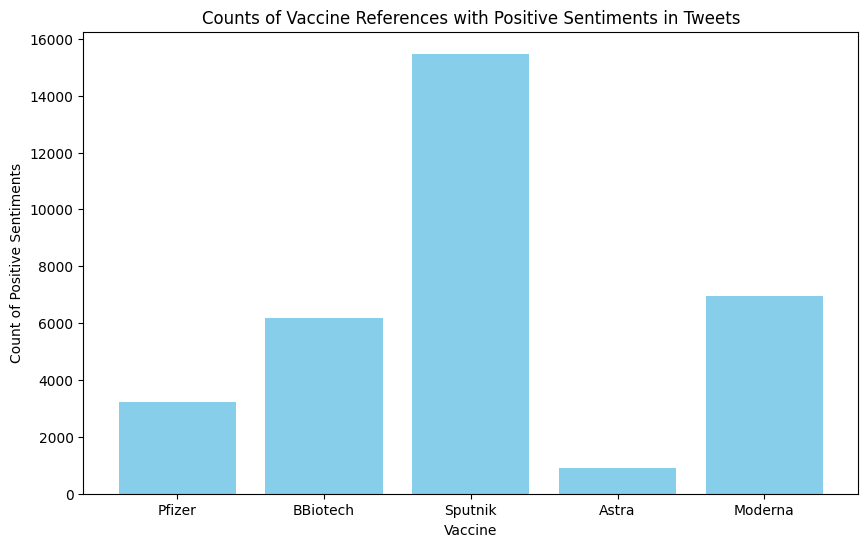

In [18]:
import matplotlib.pyplot as plt

# Filter the data to include only positive sentiment
positive_data = extracted_data[extracted_data['Sentiment Score'] > 0]

# Define the vaccine labels and count the number of positive references for each vaccine
counts = {
    'Pfizer': positive_data['pfizer'].value_counts().get(1, 0),
    'BBiotech': positive_data['bbiotech'].value_counts().get(1, 0),
    'Sputnik': positive_data['sputnik'].value_counts().get(1, 0),
    'Astra': positive_data['astra'].value_counts().get(1, 0),
    'Moderna': positive_data['moderna'].value_counts().get(1, 0)
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')

# Add labels and title
plt.xlabel('Vaccine')
plt.ylabel('Count of Positive Sentiments')
plt.title('Counts of Vaccine References with Positive Sentiments in Tweets')

# Show the plot
plt.show()


In [19]:
extracted_data1 = pd.DataFrame(extracted_data['hashtag'])

print(extracted_data1)
flattened_hashtags = [hashtag for sublist in extracted_data1['hashtag'] for hashtag in sublist]

# Get unique values
unique_hashtags = list(set(flattened_hashtags))

# Print the unique hashtags
print("Unique hashtags:", unique_hashtags)

                                                  hashtag
112307                       ['DeltaPlus', 'Coronavirus']
41727   ['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...
37934                                         ['SinoVac']
124000                      ['COVAXIN', 'GurgaonCOVAXIN']
134913                      ['COVAXIN', 'GurgaonCOVAXIN']
...                                                   ...
79971                        ['BHaratBiotech', 'covaxin']
14333   ['COVID19', 'India', 'covaxin', 'vaccine', 'Na...
215927                                        ['Covaxin']
9188                           ['COVID19', 'vaccination']
40948                         ['Covaxin', 'CovidVaccine']

[78014 rows x 1 columns]
Unique hashtags: ['่', 'औ', 'ы', '𝗮', 'म', '信', '米', 'ฆ', '学', '武', '𝙡', '𝗶', '型', 'ʙ', 'Ε', '文', 'の', 'ら', 'r', 'ル', '소', 'ୋ', 'í', 'द', 'क', 'ट', '어', 'ã', '免', '엘', 'ʟ', ' ', '合', '哈', 'प', 'ु', '왔', 'ะ', 'க', 'せ', '士', '의', 'ا', 'و', '็', 'f', 'o', 'บ', '𝐩', 'ى', 'ز', 'ओ', 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.25, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print("Number of test samples:", len(X_test))

58510 19504 58510 19504
Number of test samples: 19504


In [22]:
from keras import regularizers
from keras.models import Sequential
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Conv1D(20, 6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3), bias_regularizer=regularizers.l2(2e-3)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(20, 6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3), bias_regularizer=regularizers.l2(2e-3)))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [23]:
checkpoint_callback = ModelCheckpoint(filepath='model.weights.h5', monitor='val_loss', save_weights_only=True)

In [24]:
import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint_callback])
end_time = time.time()

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
training_time = end_time - start_time

print(training_time)

Epoch 1/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - acc: 0.4913 - loss: 1.1455 - val_acc: 0.5417 - val_loss: 0.9991
Epoch 2/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - acc: 0.5702 - loss: 0.9520 - val_acc: 0.6639 - val_loss: 0.8341
Epoch 3/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - acc: 0.6845 - loss: 0.7963 - val_acc: 0.6969 - val_loss: 0.7706
Epoch 4/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - acc: 0.7159 - loss: 0.7341 - val_acc: 0.6967 - val_loss: 0.7545
Epoch 5/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - acc: 0.7271 - loss: 0.7048 - val_acc: 0.7019 - val_loss: 0.7393
Epoch 6/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - acc: 0.7373 - loss: 0.6810 - val_acc: 0.7119 - val_loss: 0.7279
Epoch 7/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - acc: 0.7447 - loss: 0.6615 - val_acc: 0.7060 - val_loss: 0.7232
Epoch 8/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - acc: 0.7476 - loss: 0.6448 - val_acc: 0.7161 - val_loss: 0.7143
Epoch 9/15
1829/1829 ━━━

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc

sentiment = ['Neutral', 'Negative', 'Positive']
cnn_predictions = model.predict(X_test)
_y_test = [np.argmax(row) for row in y_test]
_cnn_predictions = [np.argmax(row) for row in cnn_predictions]
cnn_accuracy = accuracy_score(_y_test, _cnn_predictions)
print("CNN Model Accuracy:", cnn_accuracy)
print("Classification Report:\n", classification_report(_y_test, _cnn_predictions, target_names=sentiment))

610/610 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
CNN Model Accuracy: 0.726312551271534
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.74      0.92      0.82      9426
    Negative       0.46      0.23      0.30      2846
    Positive       0.76      0.67      0.72      7232

    accuracy                           0.73     19504
   macro avg       0.65      0.61      0.61     19504
weighted avg       0.71      0.73      0.71     19504



In [26]:
sentiment = ['Neutral','Negative','Positive']

sequence = tokenizer.texts_to_sequences(['the trump administration failed to deliver on vaccine promises shocker covidiots coronavirus covidvaccine'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


'Neutral'

In [27]:
sequence = tokenizer.texts_to_sequences(['There have not been many bright days in 2020 but here are some of the best 1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Positive'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
vectorizer = TfidfVectorizer(max_features=max_words)
X_tfidf = vectorizer.fit_transform(extracted_data['cleaned_text']).toarray()

# Train-test split for Decision Tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_tfidf, np.argmax(labels, axis=1), test_size=0.25, random_state=0)

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree model
decision_tree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier()

In [29]:
# Make predictions on the test set using the trained Decision Tree model
dt_test_predictions = decision_tree.predict(X_test_dt)

# Calculate the accuracy of the Decision Tree model by comparing the predicted values with the true values
dt_accuracy = accuracy_score(y_test_dt, dt_test_predictions)

# Print the accuracy score of the Decision Tree model
print("Decision Tree Model Accuracy:", dt_accuracy)

# Print the classification report which includes precision, recall, and F1-score for each class
print("Classification Report:\n", classification_report(y_test_dt, dt_test_predictions, target_names=sentiment))


Decision Tree Model Accuracy: 0.8873051681706317
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.91      0.94      0.92      9426
    Negative       0.76      0.71      0.74      2846
    Positive       0.90      0.89      0.90      7232

    accuracy                           0.89     19504
   macro avg       0.86      0.85      0.85     19504
weighted avg       0.89      0.89      0.89     19504



(19504,)


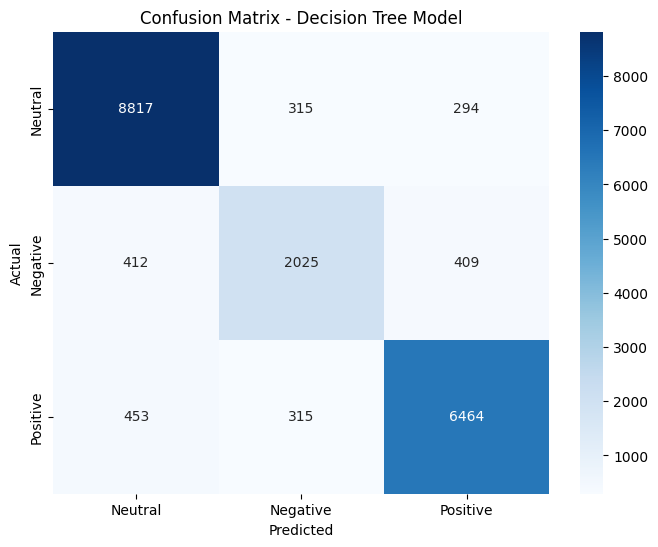

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix  # Make sure to import confusion_matrix
print(y_test_dt.shape)

# Compute the confusion matrix for the Decision Tree model
dt_cm = confusion_matrix(y_test_dt, dt_test_predictions)


# Set up the plot with a specific figure size
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Neutral', 'Negative', 'Positive'],
            yticklabels=['Neutral', 'Negative', 'Positive'])

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted')

# Label the y-axis as 'Actual'
plt.ylabel('Actual')

# Set the title of the plot
plt.title('Confusion Matrix - Decision Tree Model')

# Display the plot
plt.show()


In [31]:
def predict_sentiment_dt(text):
    """
    Predict the sentiment of a given text using a trained Decision Tree model.

    Parameters:
    text (str): The text input for sentiment prediction.

    Returns:
    str: The predicted sentiment.
    """
    # Clean the text by removing emojis
    text = remove_emoji(text)

    # Further clean the text (e.g., removing special characters, lowercasing)
    text = clean_text(text)

    # Transform the cleaned text using the pre-fitted vectorizer
    sequence = vectorizer.transform([text]).toarray()

    # Predict the sentiment using the Decision Tree model
    prediction_index = decision_tree.predict(sequence)[0]

    # Map the prediction index to the corresponding sentiment
    return sentiment[prediction_index]


In [32]:
print(predict_sentiment_dt('The planned shipment of #PfizerBiontech #vaccine to Bulgaria was postponed due to bad weather in #Germany, authorit… https://t.co/tCwTk56wfM'))

Negative


In [33]:
print(predict_sentiment_dt('Oh this been the best explanation for the vaccine and our immune response #PfizerBioNTech #Moderna https://t.co/4lwGIWBjKM'))

Positive
